In [1]:
# import library 

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
#from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor

from scipy.stats import randint, uniform
from sklearn.inspection import permutation_importance

from sklearn.metrics import r2_score, mean_squared_error


In [2]:
# import dataset
por = pd.read_csv('dataset/dataset/student-por.csv')

In [3]:
por.columns.values

array(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'G3'], dtype=object)

Dove: 
<ul>
<li><b>school</b>:  student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)</li>
<li><b>sex</b>: student's sex (binary: 'F' - female or 'M' - male)</li>
<li><b>age</b>: student's age (numeric: from 15 to 22)</li>
<li><b>address</b>: student's home address type (binary: 'U' - urban or 'R' - rural)</li>
<li><b>famsize</b>: family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)</li>
<li><b>Pstatus</b>: parent's cohabitation status (binary: 'T' - living together or 'A' - apart)</li>
<li><b>Medu</b>: mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)</li>
<li><b>Fedu</b>: Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)</li>
<li><b>Mjob</b>: Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')</li>
<li><b>Fjob</b>: Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')</li>
<li><b>reason</b>: reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')</li>
<li><b>guardian</b>: guardian - student's guardian (nominal: 'mother', 'father' or 'other')</li>
<li><b>traveltime</b>: traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)</li>
<li><b>studytime</b>: studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)</li>
<li><b>failures</b>: number of past class failures (numeric: n if 1<=n<3, else 4)</li>
<li><b>schoolsup</b>: extra educational support (binary: yes or no)</li>
<li><b>famsup</b>: family educational support (binary: yes or no)</li>
<li><b>paid</b>: extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)</li>
<li><b>activities</b>: extra-curricular activities (binary: yes or no)</li>
<li><b>nursery</b>: attended nursery school (binary: yes or no)</li>
<li><b>higher</b>: wants to take higher education (binary: yes or no)</li>
<li><b>internet</b>: Internet access at home (binary: yes or no)</li>
<li><b>romantic</b>: with a romantic relationship (binary: yes or no)</li>
<li><b>famrel</b>: quality of family relationships (numeric: from 1 - very bad to 5 - excellent)</li>
<li><b>freetime</b>: free time after school (numeric: from 1 - very low to 5 - very high)</li>
<li><b>goout</b>: going out with friends (numeric: from 1 - very low to 5 - very high)</li>
<li><b>Dalc</b>: workday alcohol consumption (numeric: from 1 - very low to 5 - very high)</li>
<li><b>Walc</b>: weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)</li>
<li><b>health</b>: current health status (numeric: from 1 - very bad to 5 - very good)</li>
<li><b>absences</b>: number of school absences (numeric: from 0 to 93)</li>

<li><b>G1</b>: first period grade (numeric: from 0 to 20)</li>
<li><b>G2</b>: second period grade (numeric: from 0 to 20)</li>
<li><b>G3</b>: final grade (numeric: from 0 to 20, output target)</li>

</ul>

In [4]:
por.shape

(649, 33)

In [5]:
len(por[por.duplicated()])

0

In [6]:
por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [7]:
por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [8]:
label_encoders = {}
onehot_encoders = {}
mapping = {}  # LabelEncoder mapping dictionary

In [9]:
categorical_columns = por.select_dtypes(exclude=['number']).columns

categorical_binary_columns = []
categorical_not_binary_columns = []


for col in categorical_columns:
        if por.nunique()[col] == 2:
                categorical_binary_columns.append(col)
        else:
               categorical_not_binary_columns.append(col)

In [10]:
# Encoding non-binary variables with OneHotEncoder and updating the mapping
for col in categorical_not_binary_columns:
    onehot_encoders[col] = OneHotEncoder(categories='auto', drop='if_binary')
    encoded_values = onehot_encoders[col].fit_transform(por[[col]])
    encoded_df = pd.DataFrame(encoded_values.toarray(), columns=onehot_encoders[col].get_feature_names_out([col]))
    por = pd.concat([por, encoded_df], axis=1)
    
    # Update the mapping
    mapping[col] = {i: cat for i, cat in enumerate(onehot_encoders[col].categories_[0])}

    por.drop(columns=[col], inplace=True)

In [11]:
# Encoding binary variables with LabelEncoder and updating the mapping
for col in categorical_binary_columns:
    label_encoders[col] = LabelEncoder()
    por[col] = label_encoders[col].fit_transform(por[col])
    
    # Update the mapping
    mapping[col] = {i: cat for i, cat in enumerate(label_encoders[col].classes_)}

In [12]:
por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   school             649 non-null    int64  
 1   sex                649 non-null    int64  
 2   age                649 non-null    int64  
 3   address            649 non-null    int64  
 4   famsize            649 non-null    int64  
 5   Pstatus            649 non-null    int64  
 6   Medu               649 non-null    int64  
 7   Fedu               649 non-null    int64  
 8   traveltime         649 non-null    int64  
 9   studytime          649 non-null    int64  
 10  failures           649 non-null    int64  
 11  schoolsup          649 non-null    int64  
 12  famsup             649 non-null    int64  
 13  paid               649 non-null    int64  
 14  activities         649 non-null    int64  
 15  nursery            649 non-null    int64  
 16  higher             649 non

Durante questa analisi andremo a vedere:

- quando si beve di più: durante il weekend o durante la settimana

In [13]:
alc_cons = por[['Dalc', 'Walc']].copy()
alc_cons['GAP'] = alc_cons.Walc - alc_cons.Dalc

In [14]:
print('alc_cons.Dalc.mean()', round(alc_cons.Dalc.mean(), 2))
print('alc_cons.Walc.mean()', round(alc_cons.Walc.mean(), 2))

alc_cons.Dalc.mean() 1.5
alc_cons.Walc.mean() 2.28


In [15]:
# Creare l'istogramma con Plotly
fig = go.Figure()

# Aggiungere l'istogramma
fig.add_trace(go.Histogram(
    x=alc_cons['GAP'],
    nbinsx=9,
    marker_color='#A054B7',
    opacity=0.75
))

# Aggiungere titolo e etichette degli assi
fig.update_layout(
    title='Distribuzione del Gap tra il Consumo di Alcol nel Weekend e durante la Settimana',
    xaxis_title='Gap (Walc - Dalc)',
    yaxis_title='Frequenza',
    bargap=0.0,
    template='simple_white'
)

# Mostrare il grafico
fig.show()


In [16]:
alc_cons.groupby('GAP')['GAP'].count()

GAP
-4      1
-3      2
-2      2
-1      8
 0    304
 1    182
 2    110
 3     35
 4      5
Name: GAP, dtype: int64

<b>Prendiamo in considerazione i valori di correlazione di Walc e Dalc con le altre feature</b>

In [17]:
# Calcolare la matrice di correlazione
correlation_matrix = por.corr()

# Estrarre le correlazioni di 'Dalc' e 'Walc'
dalc_corr = correlation_matrix['Dalc'].drop(['Dalc', 'Walc'])
walc_corr = correlation_matrix['Walc'].drop(['Dalc', 'Walc'])


In [18]:
# Estrarre i valori assoluti delle correlazioni di 'Dalc'
abs_dalc_corr = dalc_corr.abs()
# Ordinare i valori in modo discendente
abs_dalc_corr_sort = abs_dalc_corr.sort_values(ascending=False)

# Estrarre i valori assoluti delle correlazioni di 'Walc'
abs_walc_corr = walc_corr.abs()
# Ordinare i valori in modo discendente
abs_walc_corr_sort = abs_walc_corr.sort_values(ascending=False)

In [19]:
abs_dalc_corr_sort.index

Index(['sex', 'goout', 'G3', 'G1', 'G2', 'absences', 'studytime', 'age',
       'higher', 'reason_other', 'guardian_other', 'freetime', 'failures',
       'guardian_mother', 'traveltime', 'reason_reputation', 'Fjob_services',
       'nursery', 'Mjob_health', 'famrel', 'romantic', 'famsize',
       'reason_home', 'health', 'Mjob_services', 'paid', 'Fjob_other',
       'reason_course', 'address', 'school', 'internet', 'Pstatus',
       'guardian_father', 'Fjob_at_home', 'schoolsup', 'Mjob_teacher',
       'activities', 'Fjob_teacher', 'Mjob_other', 'famsup', 'Medu',
       'Fjob_health', 'Mjob_at_home', 'Fedu'],
      dtype='object')

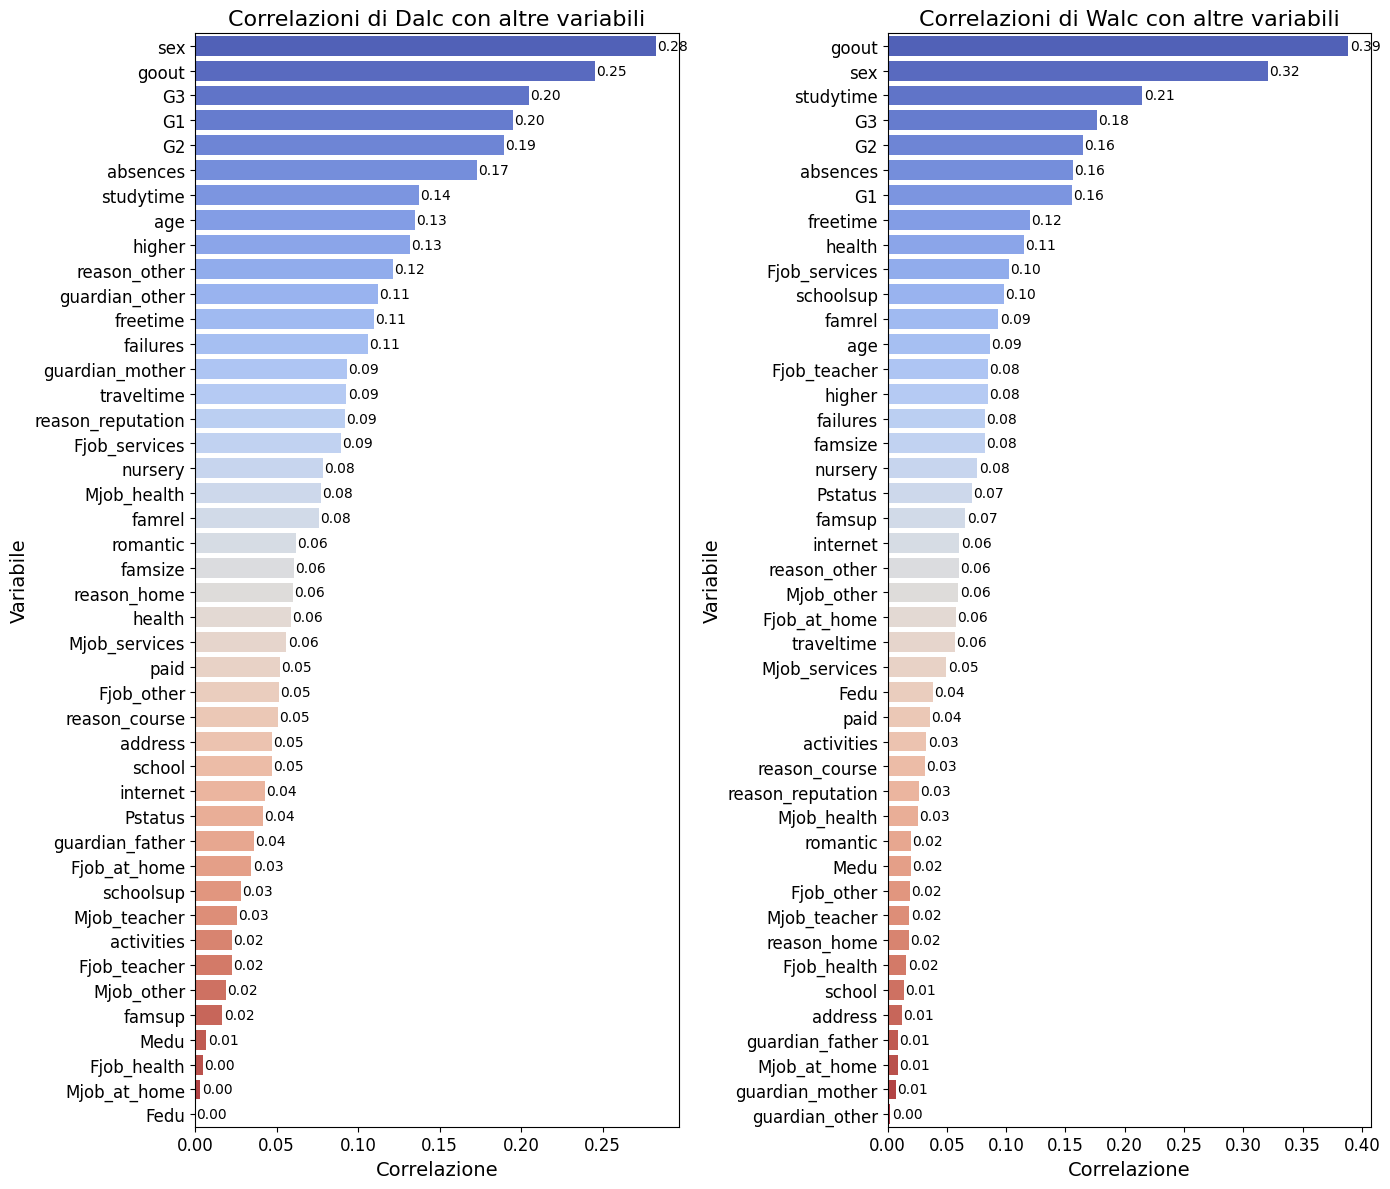

In [20]:
# Settaggi per aumentare la dimensione del font
font_title = {'size': 16}
font_labels = {'size': 14}

# Creare un grafico a barre per le correlazioni di 'Dalc'
plt.figure(figsize=(14, 12))

plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=abs_dalc_corr_sort.index, x=abs_dalc_corr_sort, palette='coolwarm', hue=abs_dalc_corr_sort.index, dodge=False)
plt.title('Correlazioni di Dalc con altre variabili', fontdict=font_title)
plt.xlabel('Correlazione', fontdict=font_labels)
plt.ylabel('Variabile', fontdict=font_labels)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Aggiungere i valori di correlazione sopra le barre
for p in ax1.patches:
    ax1.annotate(format(p.get_width(), '.2f'), 
                  (p.get_width(), p.get_y() + p.get_height() / 2.), 
                  ha = 'center', va = 'center', 
                  xytext = (12, 0), 
                  textcoords = 'offset points')

# Creare il secondo subplot per le correlazioni di 'Walc'
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=abs_walc_corr_sort.index, x=abs_walc_corr_sort, palette='coolwarm', hue=abs_walc_corr_sort.index, dodge=False)
plt.title('Correlazioni di Walc con altre variabili', fontdict=font_title)
plt.xlabel('Correlazione', fontdict=font_labels)
plt.ylabel('Variabile', fontdict=font_labels)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Aggiungere i valori di correlazione sopra le barre
for p in ax2.patches:
    ax2.annotate(format(p.get_width(), '.2f'), 
                  (p.get_width(), p.get_y() + p.get_height() / 2.), 
                  ha = 'center', va = 'center', 
                  xytext = (12, 0), 
                  textcoords = 'offset points')

plt.tight_layout()
plt.show()

Notiamo che le maggiori correlazioni sono con le seguenti variabili (valore di correlazione > 0.2):
 - sex
 - goout
 - studytime
 - G3


NB aggiungere qualche boxplot

<b>Sex</b>

Percentuali di donne che bevono durante il weekend, 

Percentuali di donne che bevono durante il fine settimana,

Percentuali di uomini che bevono durante il weekend, 

Percentuali di uomini che bevono durante il fine settimana

In [21]:
por.groupby("sex")[['Dalc', 'Walc']].mean()

,Dalc,Walc
sex,,
0,1.284595,1.937337
1,1.815789,2.774436


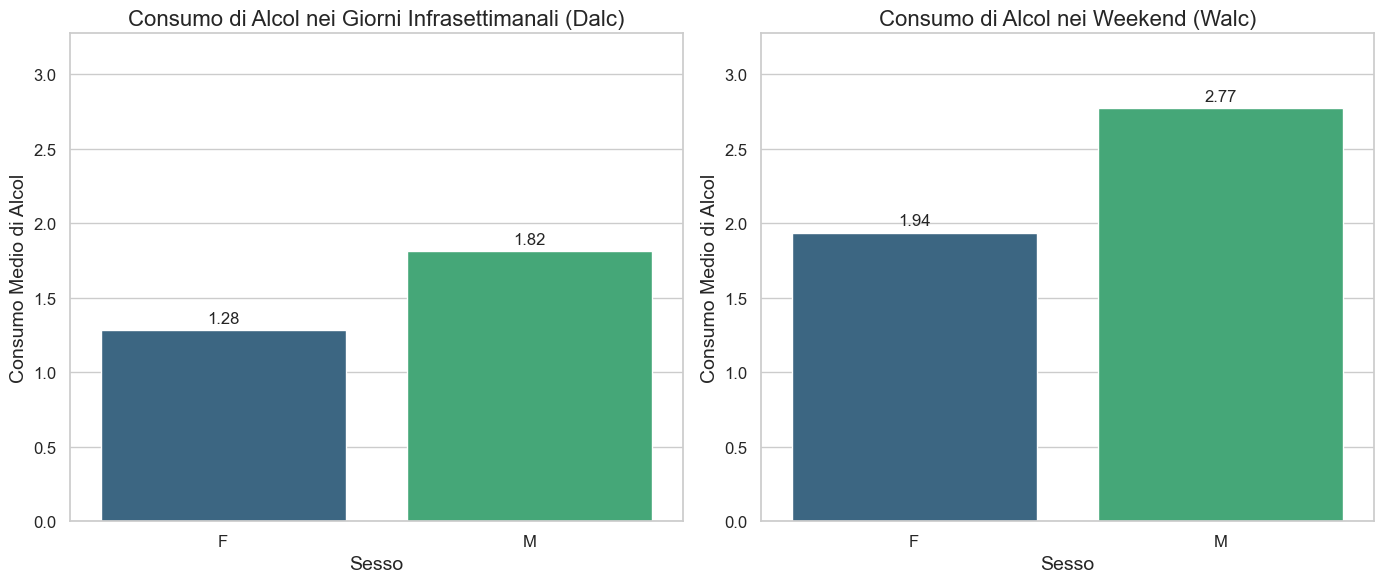

In [22]:
# Calcolare le medie di Dalc e Walc per sesso
mean_alc_cons = por.groupby("sex")[['Dalc', 'Walc']].mean().reset_index()

# Rinominare i valori di 'sex' per una visualizzazione più chiara
mean_alc_cons['sex'] = mean_alc_cons['sex'].replace(mapping['sex'])

# Trovare il valore massimo tra Dalc e Walc per impostare la stessa scala per l'asse y
max_value = max(mean_alc_cons[['Dalc', 'Walc']].max()) + 0.5

# Impostare lo stile per il grafico
sns.set_theme(style="whitegrid")

# Creare il grafico a barre
plt.figure(figsize=(14, 6))

# Dalc - consumo di alcol nei giorni infrasettimanali
ax1 = plt.subplot(1, 2, 1)
sns.barplot(x='sex', y='Dalc', data=mean_alc_cons, palette='viridis', hue='sex', dodge=False, legend=False, ax=ax1)
plt.title('Consumo di Alcol nei Giorni Infrasettimanali (Dalc)', fontsize=16)
plt.xlabel('Sesso', fontsize=14)
plt.ylabel('Consumo Medio di Alcol', fontsize=14)
plt.ylim(0, max_value)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Annotare i valori sopra le barre per Dalc
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.2f', fontsize=12, padding=3)



# Walc - consumo di alcol nei weekend
ax2 = plt.subplot(1, 2, 2)
sns.barplot(x='sex', y='Walc', data=mean_alc_cons, palette='viridis', hue='sex', dodge=False, legend=False, ax=ax2)
plt.title('Consumo di Alcol nei Weekend (Walc)', fontsize=16)
plt.xlabel('Sesso', fontsize=14)
plt.ylabel('Consumo Medio di Alcol', fontsize=14)
plt.ylim(0, max_value)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Annotare i valori sopra le barre per Walc
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.2f', fontsize=12, padding=3)

plt.tight_layout()
plt.show()


<b>Go out and study time</b>

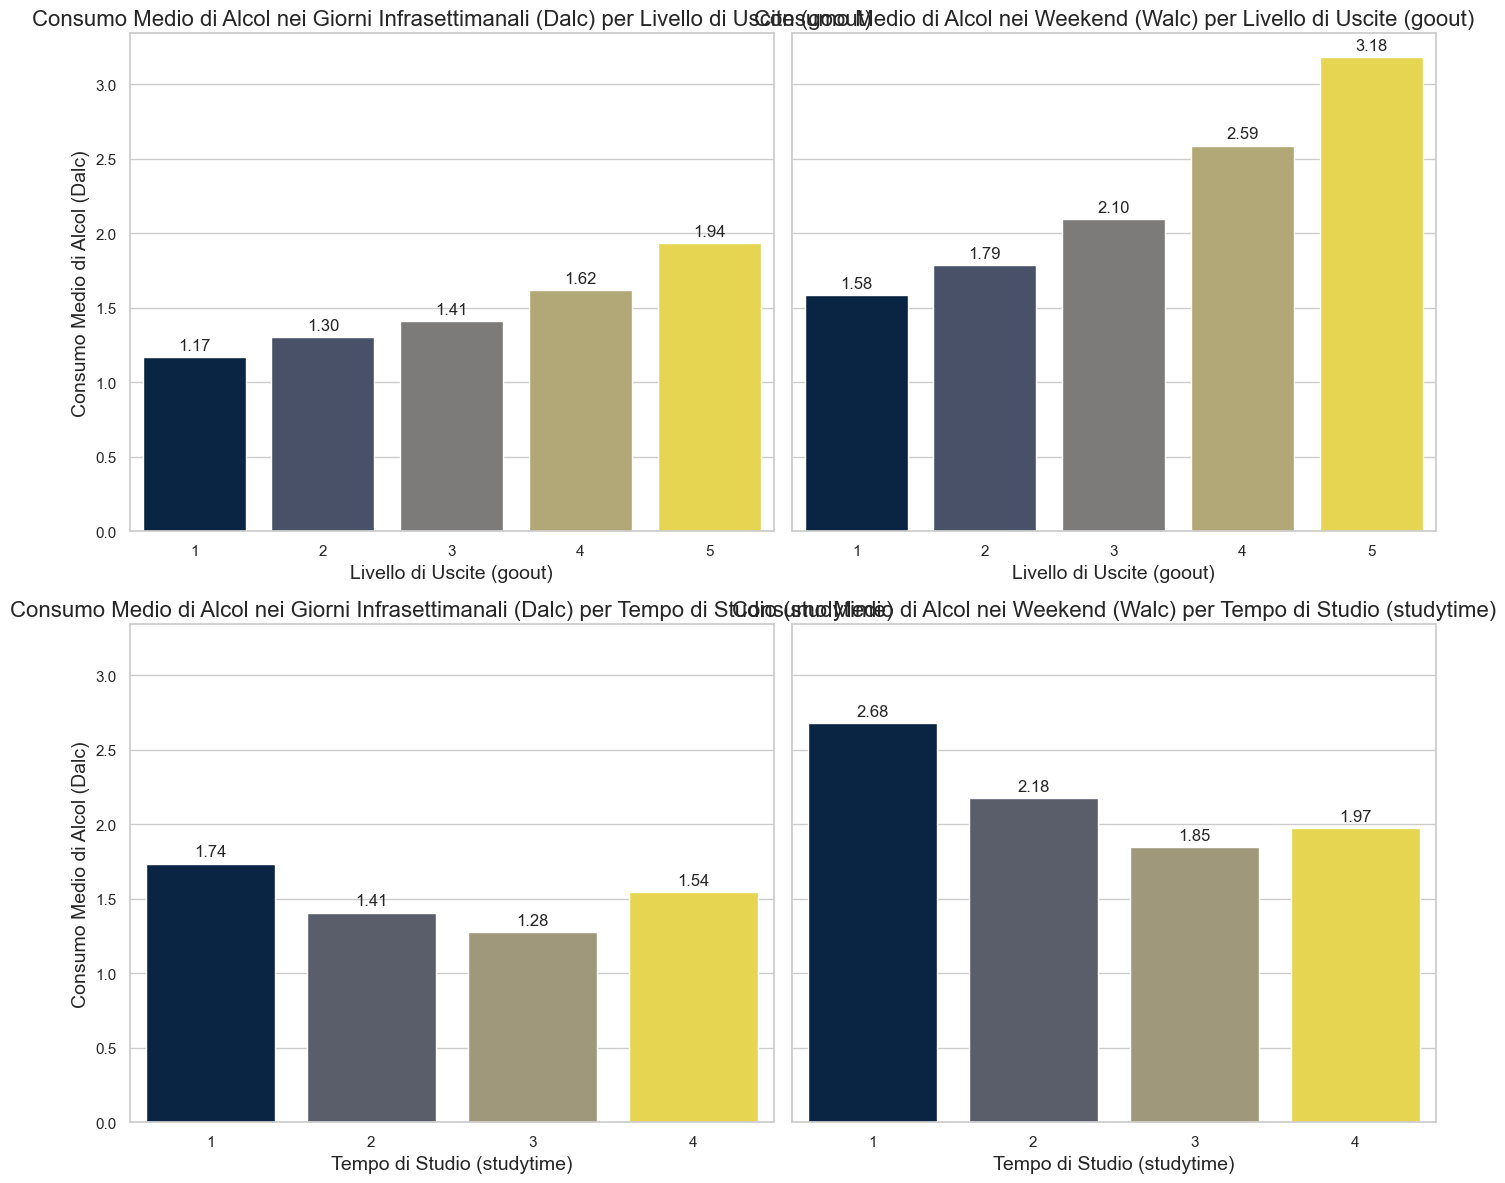

In [23]:

# Impostare lo stile per i grafici
sns.set_theme(style="whitegrid")

# Creare una figura con sottotrame
fig, axes = plt.subplots(2, 2, figsize=(14, 12), sharey=True)  # Imposta sharey=True per condividere la scala sull'asse y

# Grafico a barre per goout vs Dalc
sns.barplot(ax=axes[0, 0], x='goout', y='Dalc', data=por, hue='goout', palette='cividis', dodge=False, legend=False, errorbar=None)
axes[0, 0].set_title('Consumo Medio di Alcol nei Giorni Infrasettimanali (Dalc) per Livello di Uscite (goout)', fontsize=16)
axes[0, 0].set_xlabel('Livello di Uscite (goout)', fontsize=14)
axes[0, 0].set_ylabel('Consumo Medio di Alcol (Dalc)', fontsize=14)

# Annotare i valori sopra le barre per goout vs Dalc
for container in axes[0, 0].containers:
    axes[0, 0].bar_label(container, fmt='%.2f', fontsize=12, padding=3)

# Grafico a barre per goout vs Walc
sns.barplot(ax=axes[0, 1], x='goout', y='Walc', data=por, hue='goout', palette='cividis', dodge=False, legend=False, errorbar=None)
axes[0, 1].set_title('Consumo Medio di Alcol nei Weekend (Walc) per Livello di Uscite (goout)', fontsize=16)
axes[0, 1].set_xlabel('Livello di Uscite (goout)', fontsize=14)
axes[0, 1].set_ylabel('Consumo Medio di Alcol (Walc)', fontsize=14)

# Annotare i valori sopra le barre per goout vs Walc
for container in axes[0, 1].containers:
    axes[0, 1].bar_label(container, fmt='%.2f', fontsize=12, padding=3)

# Grafico a barre per studytime vs Dalc
sns.barplot(ax=axes[1, 0], x='studytime', y='Dalc', data=por, hue='studytime', palette='cividis', dodge=False, legend=False, errorbar=None)
axes[1, 0].set_title('Consumo Medio di Alcol nei Giorni Infrasettimanali (Dalc) per Tempo di Studio (studytime)', fontsize=16)
axes[1, 0].set_xlabel('Tempo di Studio (studytime)', fontsize=14)
axes[1, 0].set_ylabel('Consumo Medio di Alcol (Dalc)', fontsize=14)

# Annotare i valori sopra le barre per studytime vs Dalc
for container in axes[1, 0].containers:
    axes[1, 0].bar_label(container, fmt='%.2f', fontsize=12, padding=3)

# Grafico a barre per studytime vs Walc
sns.barplot(ax=axes[1, 1], x='studytime', y='Walc', data=por, hue='studytime', palette='cividis', dodge=False, legend=False, errorbar=None)
axes[1, 1].set_title('Consumo Medio di Alcol nei Weekend (Walc) per Tempo di Studio (studytime)', fontsize=16)
axes[1, 1].set_xlabel('Tempo di Studio (studytime)', fontsize=14)
axes[1, 1].set_ylabel('Consumo Medio di Alcol (Walc)', fontsize=14)

# Annotare i valori sopra le barre per studytime vs Walc
for container in axes[1, 1].containers:
    axes[1, 1].bar_label(container, fmt='%.2f', fontsize=12, padding=3)

plt.tight_layout()
plt.show()


<b>G3</b>

# Previsioni del voto finale tramite algoritmi di machine learnig

In [24]:
por.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,...,649.000000,649.000000,649.000000,649.000000,649.000000,649.00000,649.000000,649.000000,649.000000,649.000000
mean,0.348228,0.409861,16.744222,0.696456,0.295840,0.876733,2.514638,2.306626,1.568567,1.930663,...,0.565485,0.278891,0.055470,0.439137,0.229584,0.11094,0.220339,0.235747,0.701079,0.063174
std,0.476776,0.492187,1.218138,0.460143,0.456771,0.328996,1.134552,1.099931,0.748660,0.829510,...,0.496075,0.448799,0.229072,0.496665,0.420890,0.31430,0.414795,0.424792,0.458138,0.243464
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,17.000000,1.000000,0.000000,1.000000,2.000000,2.000000,1.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,2.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


Algoritmi adoperati:

1. Random Forest:
https://www.analyticsvidhya.com/blog/2021/10/an-introduction-to-random-forest-algorithm-for-beginners/

2. SVR

3. Neural Network Regressor

4. Gradient Boosting Regressor

5. KNN

6. Linear regression

In [25]:
# 1. Separazione delle feature e del target
X = por.drop(columns=['G3'])
y = por['G3']

In [55]:
pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,-0.730944,-0.833377,1.031695,0.660182,-0.648175,-2.666927,1.310216,1.540715,0.576718,0.083653,...,-1.140797,-0.621894,4.126473,1.130130,-0.545894,-0.353247,-0.53161,-0.555399,0.652973,-0.259681
1,-0.730944,-0.833377,0.210137,0.660182,-0.648175,0.374963,-1.336039,-1.188832,-0.760032,0.083653,...,0.876580,-0.621894,-0.242338,1.130130,-0.545894,-0.353247,-0.53161,1.800508,-1.531457,-0.259681
2,-0.730944,-0.833377,-1.432980,0.660182,1.542792,0.374963,-1.336039,-1.188832,-0.760032,0.083653,...,0.876580,-0.621894,-0.242338,-0.884854,-0.545894,2.830881,-0.53161,-0.555399,0.652973,-0.259681
3,-0.730944,-0.833377,-1.432980,0.660182,-0.648175,0.374963,1.310216,-0.278983,-0.760032,1.290114,...,-1.140797,1.607991,-0.242338,-0.884854,1.831858,-0.353247,-0.53161,-0.555399,0.652973,-0.259681
4,-0.730944,-0.833377,-0.611422,0.660182,-0.648175,0.374963,0.428131,0.630866,-0.760032,0.083653,...,0.876580,-0.621894,-0.242338,-0.884854,1.831858,-0.353247,-0.53161,1.800508,-1.531457,-0.259681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1.368094,-0.833377,1.853254,-1.514733,-0.648175,0.374963,-0.453954,0.630866,-0.760032,1.290114,...,0.876580,-0.621894,-0.242338,1.130130,-0.545894,-0.353247,-0.53161,-0.555399,0.652973,-0.259681
645,1.368094,-0.833377,1.031695,0.660182,1.542792,0.374963,0.428131,-1.188832,-0.760032,0.083653,...,-1.140797,1.607991,-0.242338,1.130130,-0.545894,-0.353247,-0.53161,-0.555399,0.652973,-0.259681
646,1.368094,-0.833377,1.031695,0.660182,-0.648175,0.374963,-1.336039,-1.188832,0.576718,0.083653,...,0.876580,-0.621894,-0.242338,1.130130,-0.545894,-0.353247,-0.53161,-0.555399,0.652973,-0.259681
647,1.368094,1.199937,0.210137,0.660182,1.542792,0.374963,0.428131,-1.188832,0.576718,-1.122808,...,-1.140797,1.607991,-0.242338,1.130130,-0.545894,-0.353247,-0.53161,-0.555399,0.652973,-0.259681


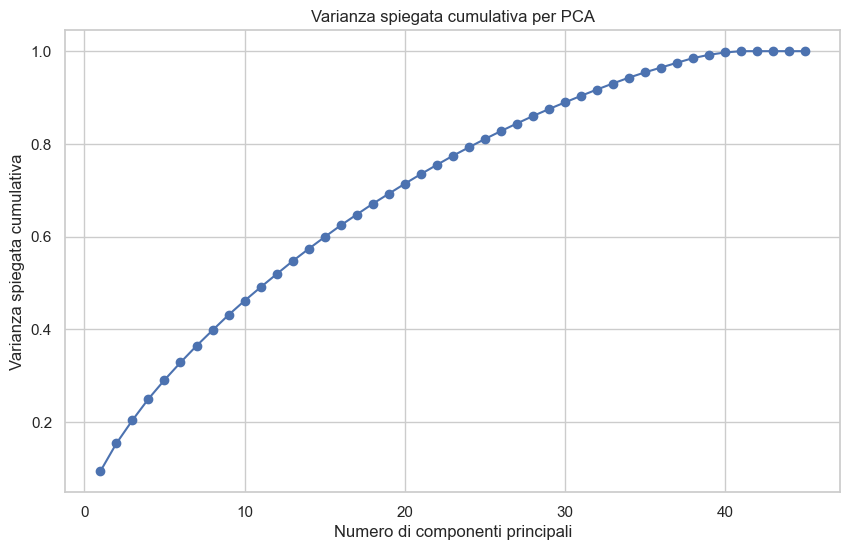

In [65]:
# 2. Riduzione della dimensionalità

'''
Normalization method: 

    https://medium.com/@mkc940/different-normalization-methods-a1be71fe9f1

    https://www.datacamp.com/tutorial/normalization-in-machine-learning

    https://www.geeksforgeeks.org/what-is-data-normalization/

DimensionalityReduction Techniques
    
    https://medium.com/nerd-for-tech/dimensionality-reduction-techniques-pca-lca-and-svd-f2a56b097f7c

    https://medium.com/machine-learning-researcher/dimensionality-reduction-pca-and-lda-6be91734f567

'''

# Normalizzazione dei dati
scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X) 
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# PCA senza specificare il numero di componenti
pca = PCA()
pca.fit(X_scaled)

# Varianza spiegata cumulativa
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot della varianza spiegata cumulativa
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Numero di componenti principali')
plt.ylabel('Varianza spiegata cumulativa')
plt.title('Varianza spiegata cumulativa per PCA')
plt.grid(True)
plt.show()


In [54]:
X_pca

array([[-0.50881762, -0.08552028, -0.63504057, ..., -0.67781245,
         0.22217963,  0.09620343],
       [-1.08513725, -1.95091344, -0.90087874, ..., -0.01226067,
         0.18506374, -0.82406778],
       [-0.30927437, -1.33283398,  0.19247467, ..., -0.72948956,
        -0.05499076, -0.59639633],
       ...,
       [-1.58967574, -3.02048149,  0.55515482, ...,  0.08358536,
        -0.13554766, -0.13090649],
       [-1.49901767,  2.97454105, -0.75819997, ..., -0.48956804,
        -0.7918469 , -0.30602552],
       [-1.80939893,  1.57524489,  0.17185483, ..., -0.68005344,
        -0.07994531,  0.34784586]])

In [58]:
# Scegliere il numero di componenti che spiegano almeno il 95% della varianza
threshold = 0.95
num_components = np.argmax(cumulative_variance >= threshold) + 1

print(f"Numero di componenti principali per spiegare almeno il 95% della varianza: {num_components}")

# Riduzione della dimensionalità con il numero ottimale di componenti
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_scaled)

# Salva i nomi delle colonne originali prima di applicare PCA
col_names = X.columns.tolist()

Numero di componenti principali per spiegare almeno il 95% della varianza: 35


In [67]:
# Estrazione dei coefficienti del PCA
pca_components = pca.components_

# Creazione di un dataframe per visualizzare l'importanza delle feature originali
original_feature_names = X.columns.tolist()

In [69]:
feature_importances = np.sum(np.abs(pca_components), axis=0)

# Creazione di un dataframe per visualizzare l'importanza delle feature originali
pca_importance_df = pd.DataFrame({'Feature': original_feature_names, 'Importance': feature_importances})

# Ordinamento delle feature per importanza
pca_importance_df = pca_importance_df.sort_values(by='Importance', ascending=False)


In [70]:



pca_importance_df

,Feature,Importance
37,Fjob_teacher,5.469254
44,guardian_other,5.451257
40,reason_other,5.353693
32,Mjob_teacher,5.265757
3,address,5.203091
21,goout,5.177775
9,studytime,5.126839
29,Mjob_health,5.106606
13,paid,5.096373
33,Fjob_at_home,5.092660


In [59]:
# 3. Divisione del dataset in training e test

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


In [ ]:
# 4. Ottimizzazione dei parametri di ogni modello

'''
Supervised ML regression algorithms

    https://www.onlinemanipal.com/blogs/popular-regression-algorithms-in-machine-learning

    https://www.analyticsvidhya.com/blog/2021/05/5-regression-algorithms-you-should-know-introductory-guide/

    https://www.geeksforgeeks.org/regression-in-machine-learning/



Parameter optimization machine learning models

    https://www.linkedin.com/pulse/machine-learning-optimization-techniques-bilal-el-jamal/

    https://www.datacamp.com/tutorial/parameter-optimization-machine-learning-models
    
'''

# Definizione delle distribuzioni dei parametri da ottimizzare per ogni modello
param_dist_rf = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30]
}

param_dist_svr = {
    'C': uniform(0.1, 100),
    'gamma': uniform(1e-4, 1e-1)
}

param_dist_knn = {
    'n_neighbors': randint(3, 10),
    'weights': ['uniform', 'distance']
}

param_dist_lr = {
    'C': uniform(0.1, 100)
}

# Modelli
rf = RandomForestRegressor(random_state=42)
svr = SVR()
knn = KNeighborsRegressor()
lr = LogisticRegression(max_iter=1000)

# RandomizedSearchCV per ogni modello
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_dist_rf, n_iter=20, cv=5, scoring='r2', random_state=42, n_jobs=-1)
random_search_svr = RandomizedSearchCV(estimator=svr, param_distributions=param_dist_svr, n_iter=20, cv=5, scoring='r2', random_state=42, n_jobs=-1)
random_search_knn = RandomizedSearchCV(estimator=knn, param_distributions=param_dist_knn, n_iter=20, cv=5, scoring='r2', random_state=42, n_jobs=-1)
random_search_lr = RandomizedSearchCV(estimator=lr, param_distributions=param_dist_lr, n_iter=20, cv=5, scoring='r2', random_state=42, n_jobs=-1)


In [60]:
'''
math explained 


Random forest:
    https://medium.com/capital-one-tech/random-forest-algorithm-for-machine-learning-c4b2c8cc9feb

Decision Tree:
    https://ankitnitjsr13.medium.com/math-behind-decision-tree-algorithm-2aa398561d6d

Gradient Boosting Regressor:
    https://medium.com/geekculture/gradient-boosting-for-regression-math-intuition-71f9a9826035#:~:text=Gradient%20Boosting%20starts%20by%20making,made%20by%20the%20previous%20tree.
SVM

Ridge Regression

KNN
'''

# Definizione delle distribuzioni dei parametri
param_dist_rf = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None]
}

param_dist_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20)
}

param_dist_gb = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'subsample': uniform(0.7, 0.3)
}

param_dist_svr = {
    'C': uniform(0.1, 100),
    'gamma': ['scale', 'auto'] + list(uniform(0.0001, 0.1).rvs(10)),
    'epsilon': uniform(0.1, 1.0)
}


param_dist_nn = {
    'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50), (100,), (100, 100), (100, 50, 25)],
    'activation': ['tanh', 'relu', 'logistic'],
    #'solver': ['sgd', 'adam', 'lbfgs'],
    'solver': ['sgd', 'adam'],
    'alpha': uniform(0.0001, 0.1),
    'learning_rate': ['constant', 'adaptive', 'invscaling'],
    'max_iter': [5000, 6000, 7000],  # aumentare ulteriormente il numero massimo di iterazioni
    'early_stopping': [True, False]
}

param_dist_lr = {}  # Linear Regression non ha iperparametri da ottimizzare

param_dist_ridge = {
    'alpha': uniform(0.1, 10)
}

param_dist_knn = {
    'n_neighbors': randint(1, 30),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}


In [61]:
# Definizione dei modelli
models = {
    'RandomForest': (RandomForestRegressor(random_state=42), param_dist_rf),
    'DecisionTree': (DecisionTreeRegressor(random_state=42), param_dist_dt),
    'GradientBoosting': (GradientBoostingRegressor(random_state=42), param_dist_gb),
    'SVR': (SVR(), param_dist_svr),
    #'NeuralNetwork': (MLPRegressor(max_iter=1000, random_state=42), param_dist_nn),
    #'LinearRegression': (LinearRegression(), param_dist_lr),
    'Ridge': (Ridge(), param_dist_ridge),
    'KNN': (KNeighborsRegressor(), param_dist_knn)
}

# RandomizedSearchCV per ogni modello
random_searches = {}
for model_name, (model, param_dist) in models.items():
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=20, cv=5, scoring='r2', random_state=42, n_jobs=-1, error_score='raise')
    random_search.fit(X_train, y_train)
    random_searches[model_name] = random_search
    print(f"Best parameters for {model_name}: {random_search.best_params_}")

# Previsione e valutazione dei modelli
results = {}
for model_name, search in random_searches.items():
    y_pred = search.best_estimator_.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results[model_name] = {'R^2': r2, 'MSE': mse}

# Creazione del DataFrame per i risultati
results_df = pd.DataFrame(results).T
print("Risultati delle previsioni:")
print(results_df)


Best parameters for RandomForest: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 84}
Best parameters for DecisionTree: {'max_depth': 20, 'min_samples_leaf': 15, 'min_samples_split': 12}
Best parameters for GradientBoosting: {'learning_rate': np.float64(0.13826230550756488), 'max_depth': 4, 'min_samples_leaf': 13, 'min_samples_split': 8, 'n_estimators': 101, 'subsample': np.float64(0.8689826715929151)}
Best parameters for SVR: {'C': np.float64(33.47086111390219), 'epsilon': np.float64(0.2428668179219408), 'gamma': np.float64(0.014383249219383932)}
Best parameters for Ridge: {'alpha': np.float64(9.799098521619943)}
Best parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'distance'}
Risultati delle previsioni:
                       R^2       MSE
RandomForest      0.596017  3.939528
DecisionTree      0.449372  5.369563
GradientBoosting  0.723211  2.699169
SVR               0.730516  2.627930
Ridge             0

In [ ]:
# 5. Addestramento di ogni modello ottimizzato

# Adattamento dei modelli con i dati di addestramento
random_search_rf.fit(X_train, y_train)
random_search_svr.fit(X_train, y_train)
random_search_knn.fit(X_train, y_train)
random_search_lr.fit(X_train, y_train)

# Stampa dei migliori parametri per ogni modello
print(f"Best parameters for RandomForestRegressor: {random_search_rf.best_params_}")
print(f"Best parameters for SVR: {random_search_svr.best_params_}")
print(f"Best parameters for KNeighborsRegressor: {random_search_knn.best_params_}")
print(f"Best parameters for LogisticRegression: {random_search_lr.best_params_}")

In [ ]:
# 6. Previsione e valutazione di ogni modello

# Previsione sui dati di test utilizzando i migliori modelli trovati dalla RandomizedSearchCV
y_pred_rf = random_search_rf.best_estimator_.predict(X_test)
y_pred_svr = random_search_svr.best_estimator_.predict(X_test)
y_pred_knn = random_search_knn.best_estimator_.predict(X_test)
y_pred_lr = random_search_lr.best_estimator_.predict(X_test)

# Valutazione delle prestazioni
print("Random Forest R^2:", r2_score(y_test, y_pred_rf))
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))

print("SVR R^2:", r2_score(y_test, y_pred_svr))
print("SVR MSE:", mean_squared_error(y_test, y_pred_svr))

print("KNN R^2:", r2_score(y_test, y_pred_knn))
print("KNN MSE:", mean_squared_error(y_test, y_pred_knn))

print("Logistic Regression R^2:", r2_score(y_test, y_pred_lr))
print("Logistic Regression MSE:", mean_squared_error(y_test, y_pred_lr))

In [ ]:
# Calcolo delle metriche R^2 e MSE per ogni modello
models = ['Random Forest', 'SVR', 'KNN', 'Logistic Regression']
r2_scores = [r2_score(y_test, y_pred_rf), r2_score(y_test, y_pred_svr), 
             r2_score(y_test, y_pred_knn), r2_score(y_test, y_pred_lr)]
mse_scores = [mean_squared_error(y_test, y_pred_rf), mean_squared_error(y_test, y_pred_svr), 
              mean_squared_error(y_test, y_pred_knn), mean_squared_error(y_test, y_pred_lr)]

# Creazione del DataFrame per i risultati
results_df = pd.DataFrame({
    'Modello': models,
    'R^2': r2_scores,
    'MSE': mse_scores
})

# Stampare la tabella dei risultati
print("Risultati delle previsioni:")
print(results_df)

In [ ]:
# 7. Visualizzazione dell'importanza delle feature

In [ ]:
# Nome delle componenti principali
pca_feature_names = [f'PC{i+1}' for i in range(num_components)]

In [167]:
def plot_feature_test(model, feature_names, col_names, model_name):
    # RandomForest, DecisionTree, GradientBoosting
    if hasattr(model, 'feature_importances_'):
        print(model_name, ': HA attributo feature_importance_')
        
        importances = model.feature_importances_
        #indices = np.argsort(importances)[::-1]
        
    
    # SVR, Ridge, KNN
    else:
        if model_name == 'Ridge':
            '''
            ridge_model = random_searches['Ridge'].best_estimator_
            ridge_importances = np.abs(ridge_model.coef_)
            plot_feature_importances(ridge_importances, pca_feature_names, 'Ridge')
            '''
            importances = np.abs(model.coef_)
        else:
            #model = random_searches[model_name].best_estimator_
            importances = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
            importances = importances.importances_mean
            print(model_name, ': SVR')
            '''
            model = random_searches[model_name].best_estimator_
            result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
            plot_feature_importances(result.importances_mean, pca_feature_names, model_name)
            '''

        '''
        plt.figure(figsize=(10, 6))
        plt.title(f"Feature importances for {model_name}")
        plt.barh(range(len(indices)), importances[indices], align='center')
        plt.yticks(range(len(indices)), [pca_feature_names[i] for i in indices])
        plt.xlabel('Relative Importance')
        plt.show()
        '''

    indices = np.argsort(importances)
    title = f"Feature Importances - {model_name}"

    plt.figure(figsize=(10, 8))
    plt.barh(range(len(feature_names)), importances[indices], align="center")
    plt.yticks(range(len(feature_names)), [col_names[i] for i in indices], rotation=45, ha='right')
    plt.title(title)
    plt.ylabel('Feature')
    plt.xlabel('Importance')
    plt.tight_layout()  # Opzionale: migliora la disposizione delle labels
    plt.show()  


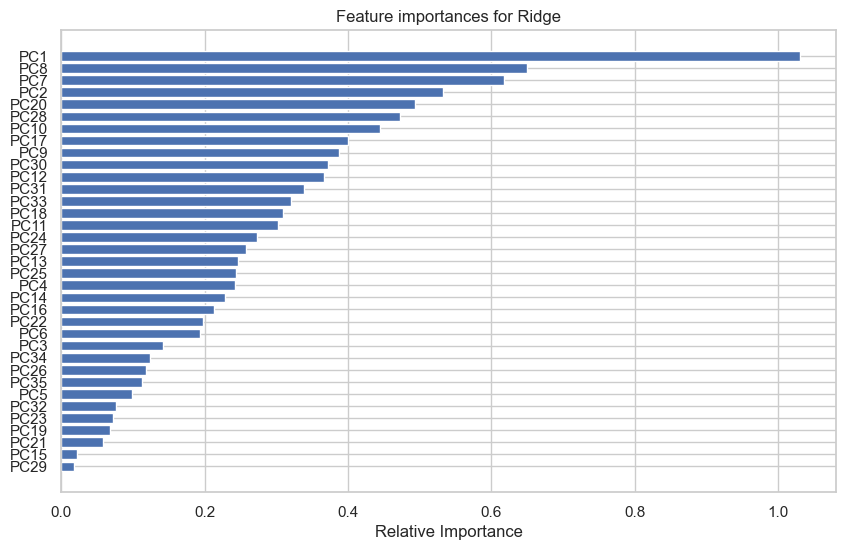

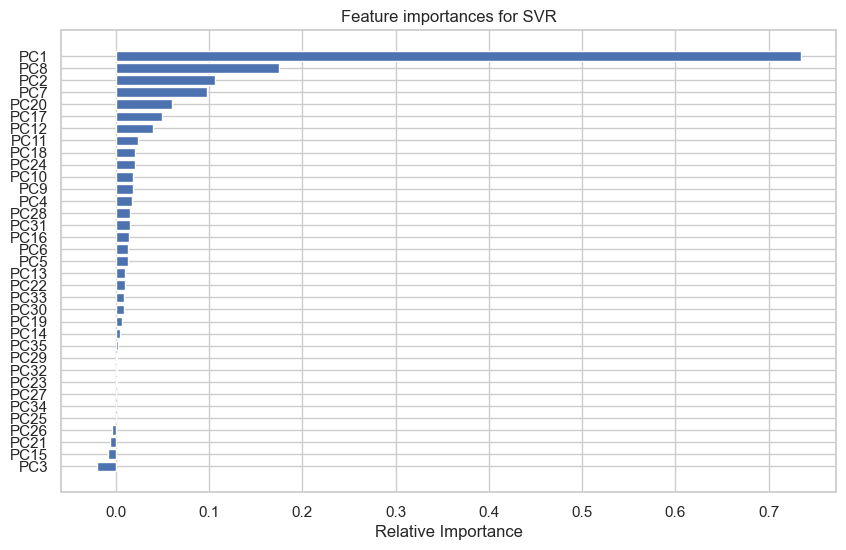

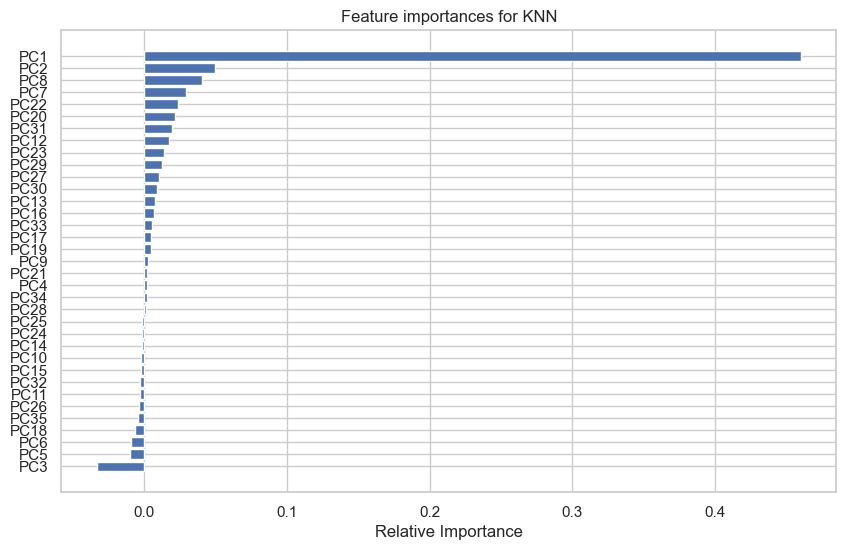

In [155]:
def plot_feature_importances(importances, feature_names, model_name):
    indices = np.argsort(importances)
    plt.figure(figsize=(10, 6))
    plt.title(f"Feature importances for {model_name}")
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [pca_feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

# Ridge: importanza delle feature tramite i coefficienti del modello
ridge_model = random_searches['Ridge'].best_estimator_
ridge_importances = np.abs(ridge_model.coef_)
plot_feature_importances(ridge_importances, pca_feature_names, 'Ridge')

# SVR e KNN: importanza delle feature tramite permutazione
for model_name in ['SVR', 'KNN']:
    model = random_searches[model_name].best_estimator_
    result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
    plot_feature_importances(result.importances_mean, pca_feature_names, model_name)

RandomForest : HA attributo feature_importance_


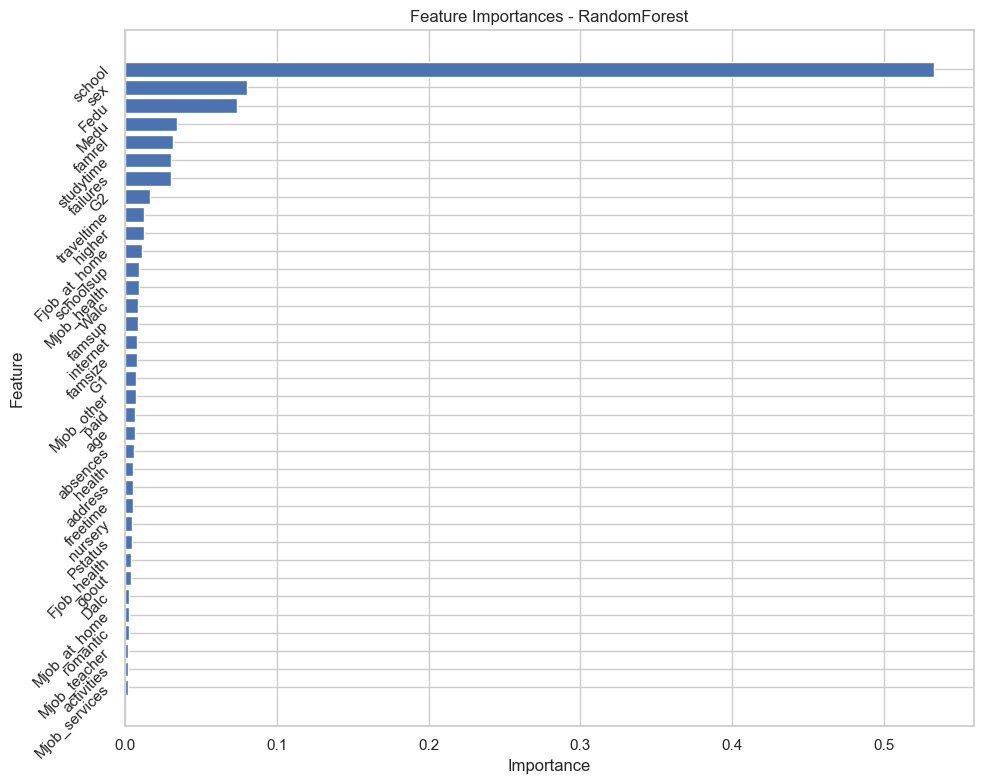

DecisionTree : HA attributo feature_importance_


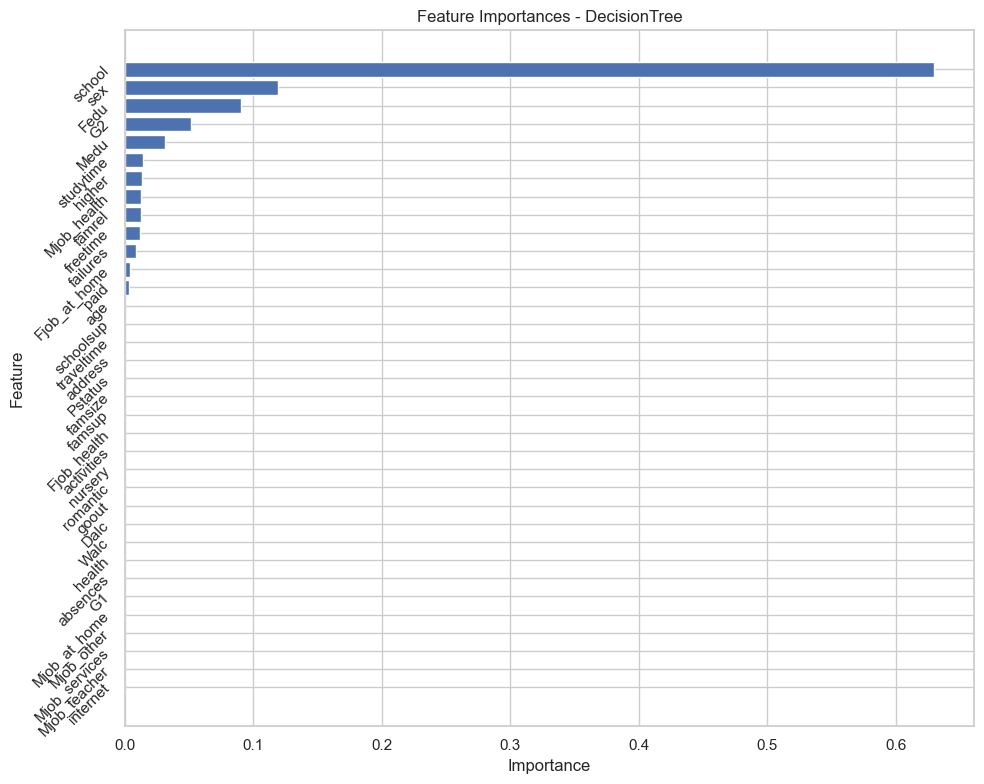

GradientBoosting : HA attributo feature_importance_


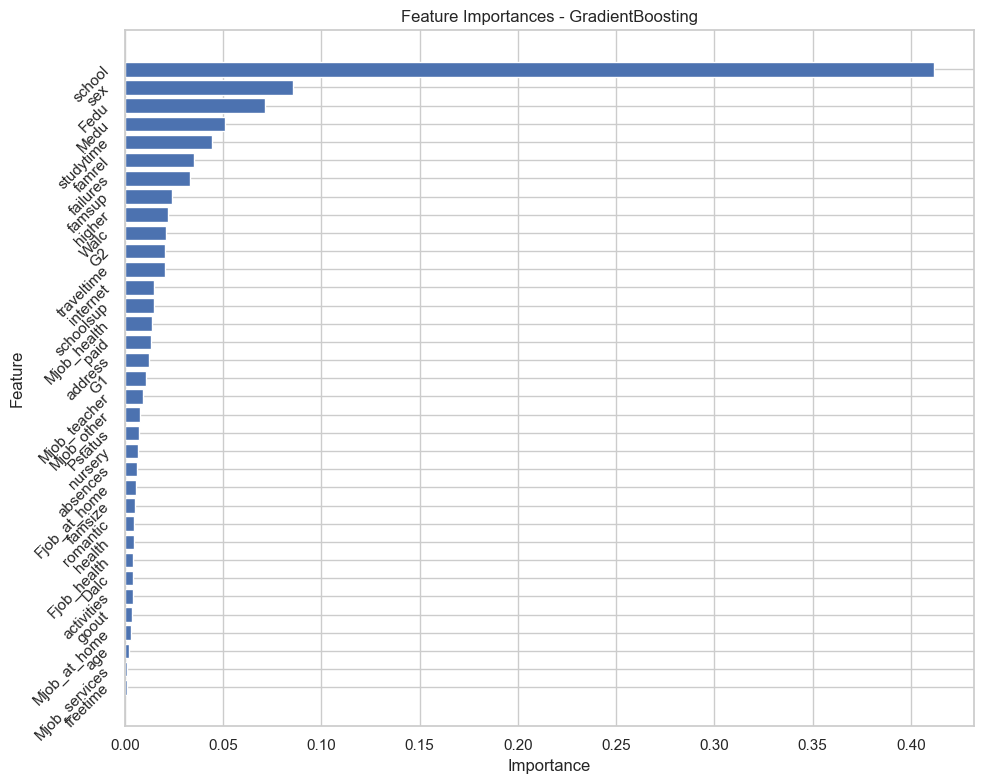

SVR : SVR


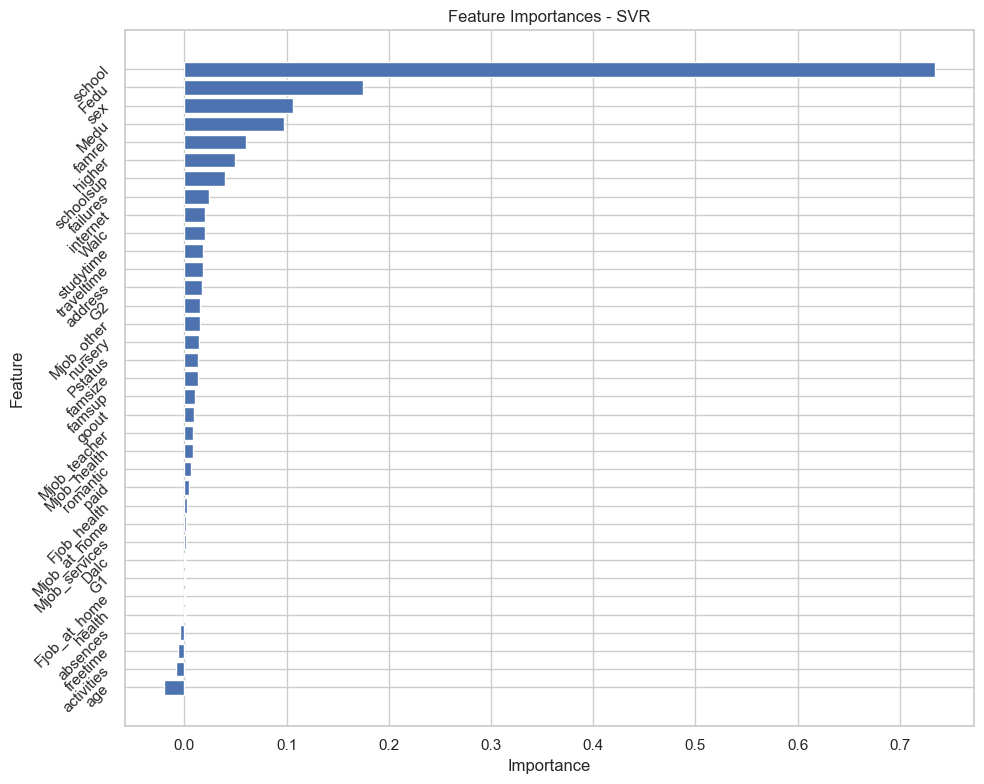

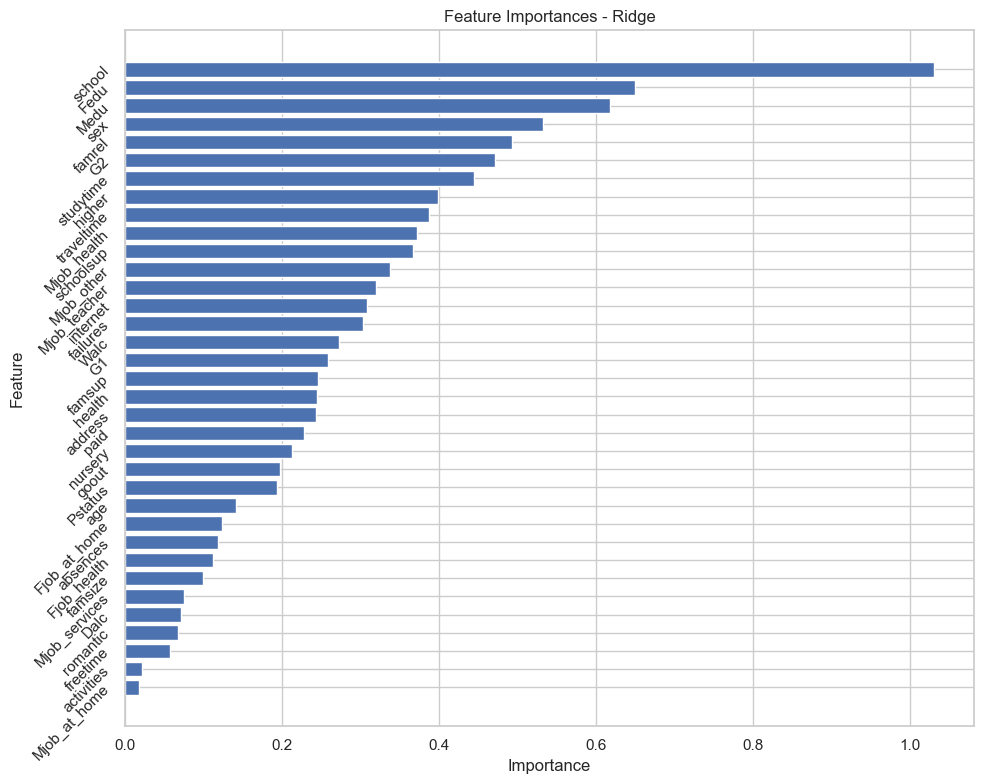

KNN : SVR


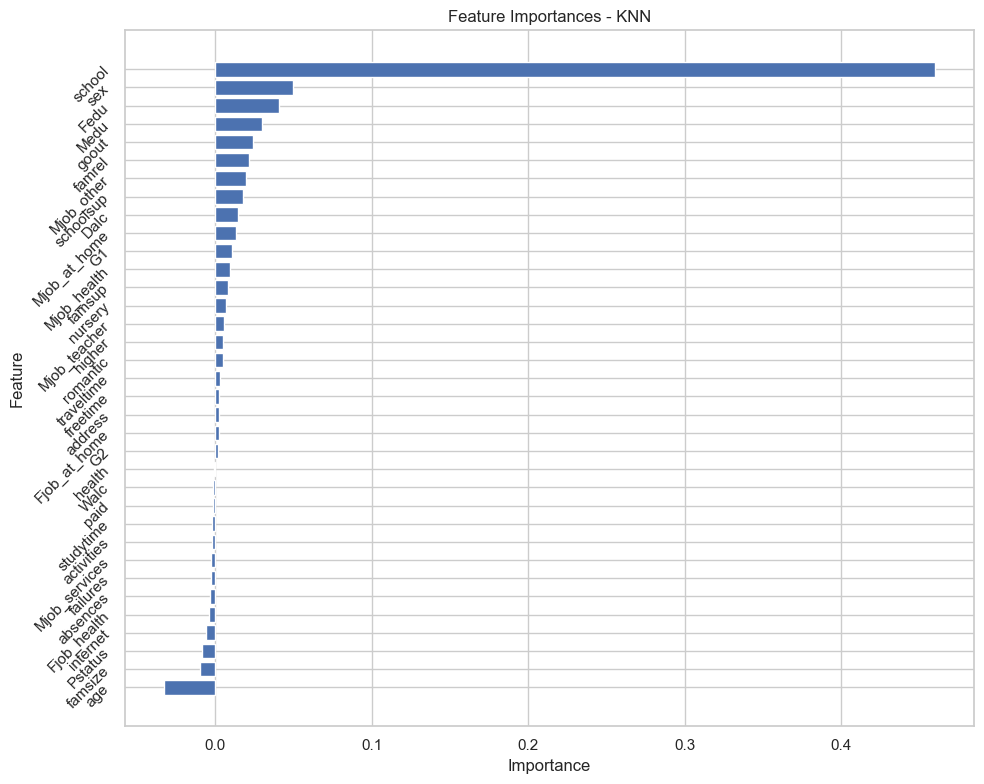

In [168]:
for model_name, model_info in models.items():
    plot_feature_test(random_searches[model_name].best_estimator_, pca_feature_names, col_names, model_name)

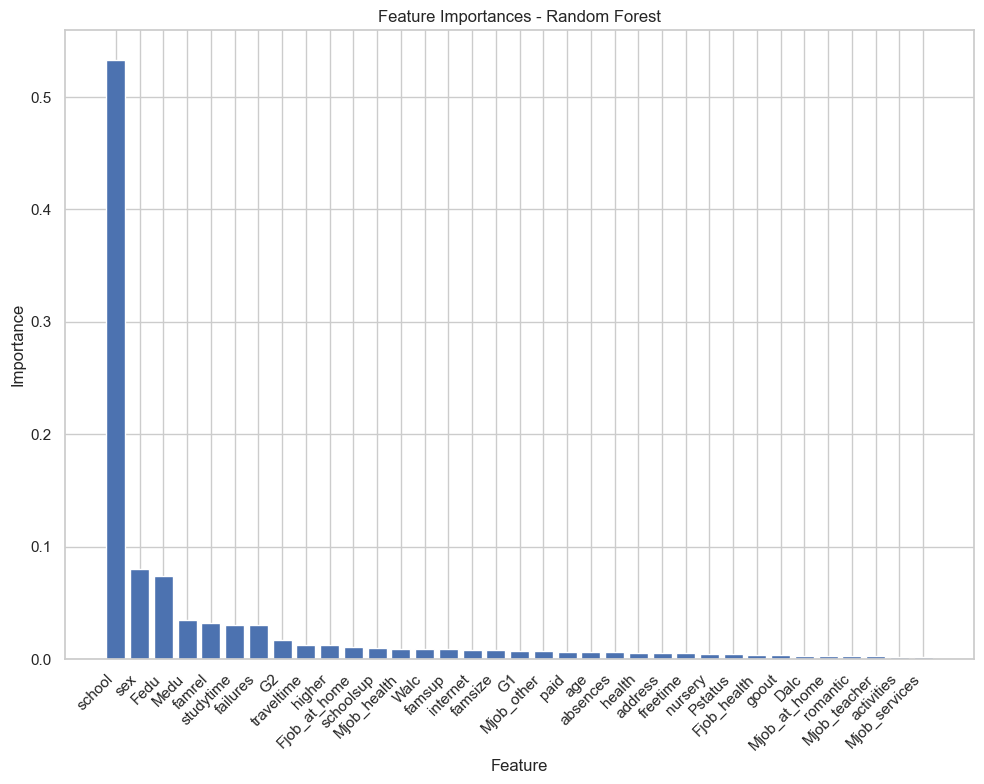

In [106]:
def plot_feature_importances(model, feature_names, col_names, model_name):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        title = f"Feature Importances - {model_name}"
        
        plt.figure(figsize=(10, 8))
        plt.bar(range(len(feature_names)), importances[indices], align="center")
        plt.xticks(range(len(feature_names)), [col_names[i] for i in indices], rotation=45, ha='right')
        plt.title(title)
        plt.xlabel('Feature')
        plt.ylabel('Importance')
        plt.tight_layout()  # Opzionale: migliora la disposizione delle labels
        plt.show()


plot_feature_importances(random_searches['RandomForest'].best_estimator_, pca_feature_names, col_names, 'Random Forest')

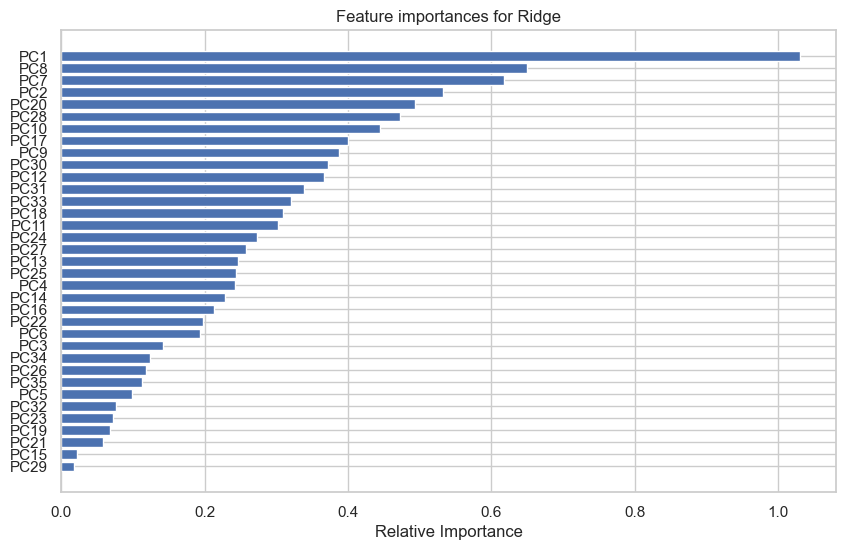

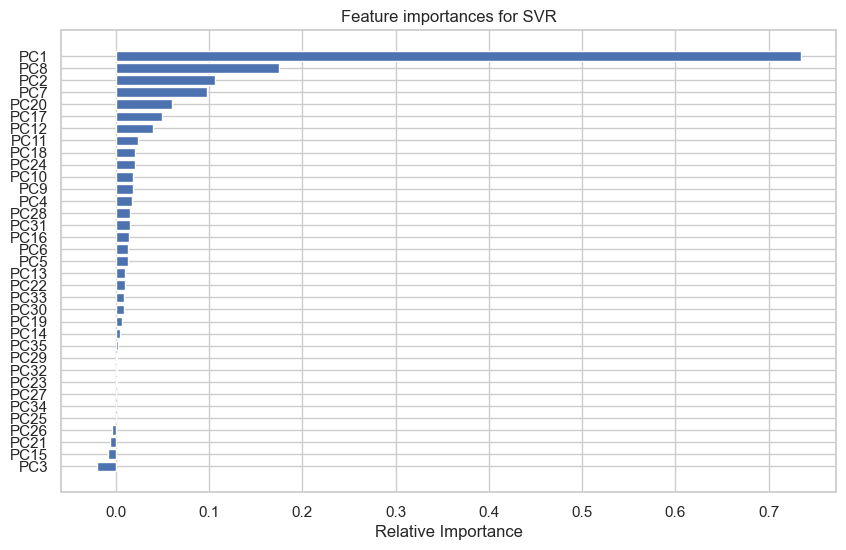

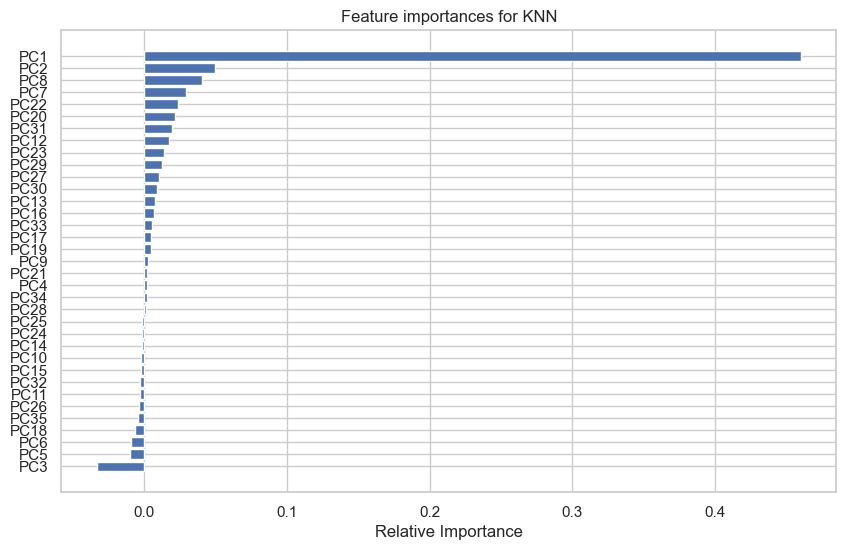

In [104]:

from sklearn.inspection import permutation_importance

def plot_feature_importances(importances, feature_names, model_name):
    indices = np.argsort(importances)
    plt.figure(figsize=(10, 6))
    plt.title(f"Feature importances for {model_name}")
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [pca_feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

# Ridge: importanza delle feature tramite i coefficienti del modello
ridge_model = random_searches['Ridge'].best_estimator_
ridge_importances = np.abs(ridge_model.coef_)
plot_feature_importances(ridge_importances, pca_feature_names, 'Ridge')

# SVR e KNN: importanza delle feature tramite permutazione
for model_name in ['SVR', 'KNN']:
    model = random_searches[model_name].best_estimator_
    result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
    plot_feature_importances(result.importances_mean, pca_feature_names, model_name)


In [99]:
for model_name, model_info in models.items():
    print(model_name)  # stampa il nome del modello
    print(random_searches[model_name].best_estimator_)  # accede a random_searches usando il nome del modello
    # Se vuoi stampare anche model_info, puoi farlo così:
    print(model_info)

    # plot_feature_importances(random_searches[model_name].best_estimator_, pca_feature_names, col_names, model_name))

RandomForest
RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=8,
                      min_samples_split=8, n_estimators=84, random_state=42)
(RandomForestRegressor(random_state=42), {'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x294cb6420>, 'max_depth': [None, 10, 20, 30], 'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x294dbf5c0>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x294e4b530>, 'max_features': ['sqrt', 'log2', None]})
DecisionTree
DecisionTreeRegressor(max_depth=20, min_samples_leaf=15, min_samples_split=12,
                      random_state=42)
(DecisionTreeRegressor(random_state=42), {'max_depth': [None, 10, 20, 30], 'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x294c99af0>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x294e033b0>})
GradientBoosting
Gradien

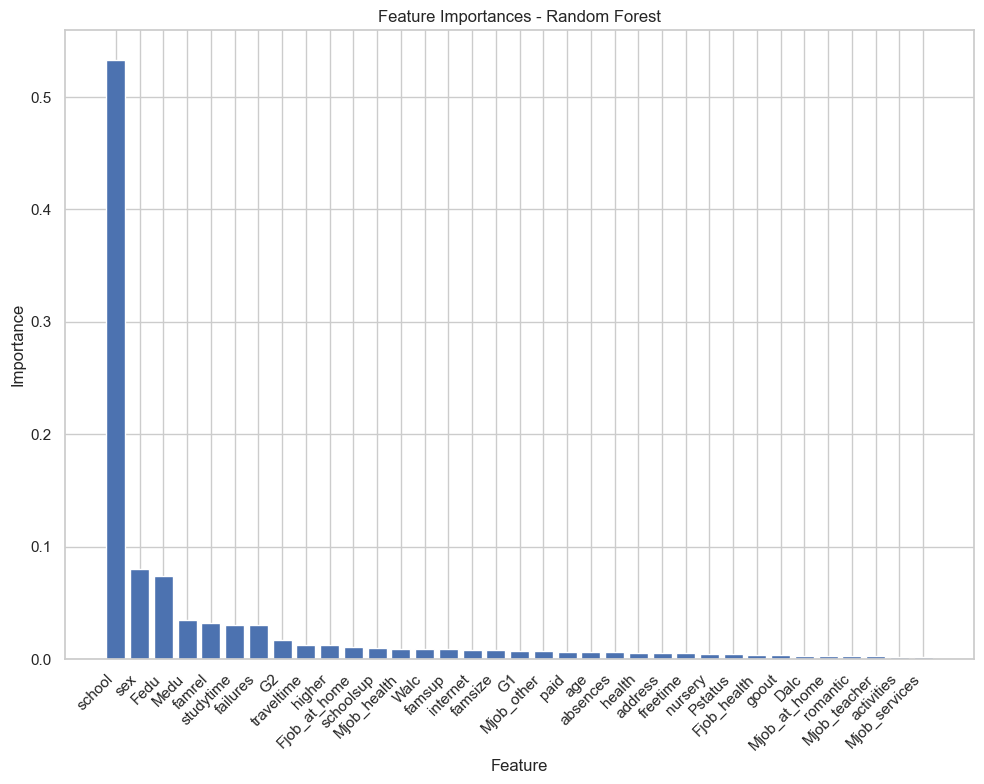

In [74]:
def plot_feature_importances(model, feature_names, col_names, model_name):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        title = f"Feature Importances - {model_name}"
        
        plt.figure(figsize=(10, 8))
        plt.bar(range(len(feature_names)), importances[indices], align="center")
        plt.xticks(range(len(feature_names)), [col_names[i] for i in indices], rotation=45, ha='right')
        plt.title(title)
        plt.xlabel('Feature')
        plt.ylabel('Importance')
        plt.tight_layout()  # Opzionale: migliora la disposizione delle labels
        plt.show()

plot_feature_importances(random_searches['RandomForest'].best_estimator_, pca_feature_names, col_names, 'Random Forest')

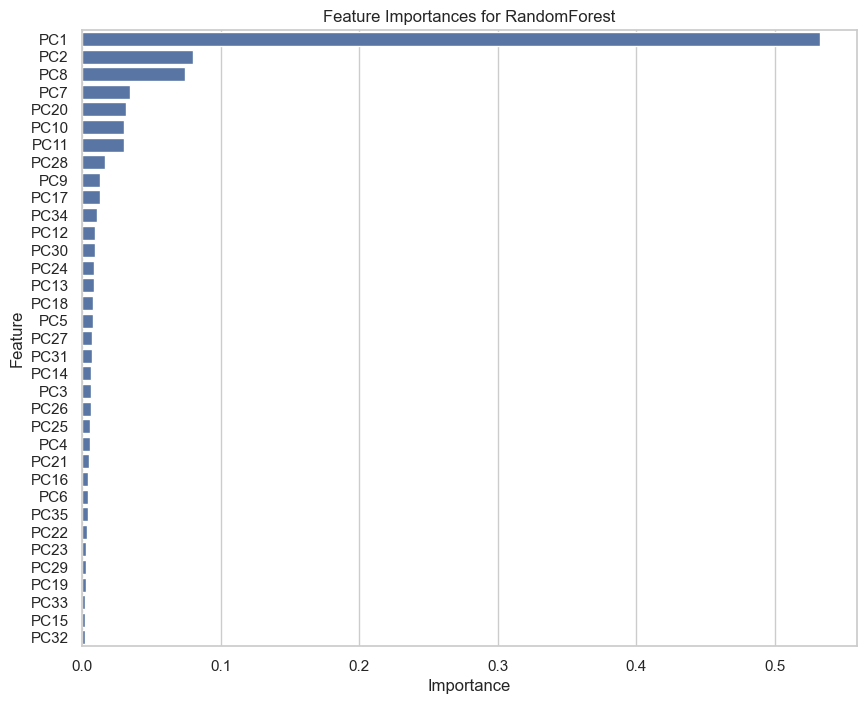

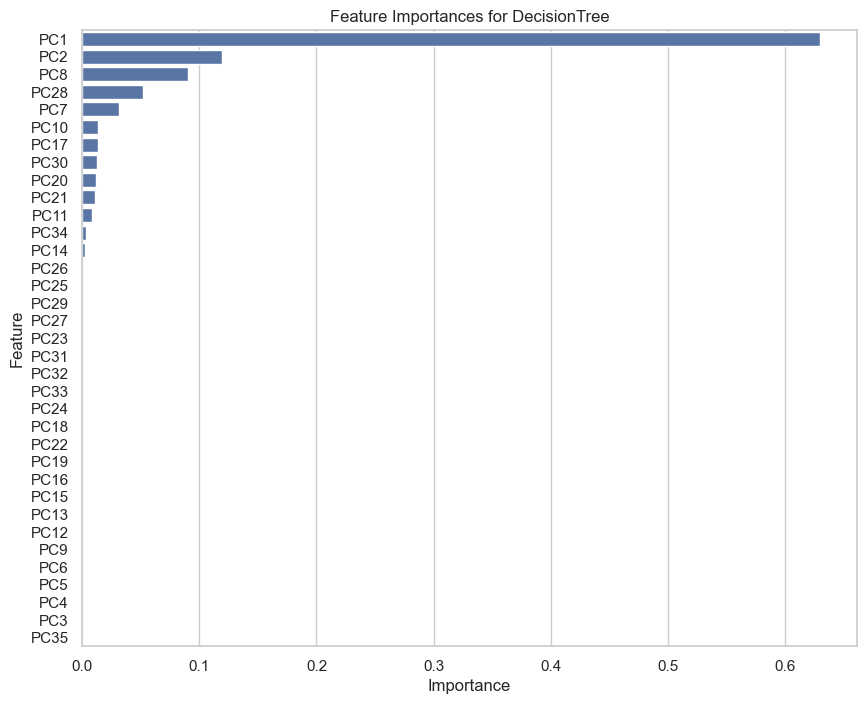

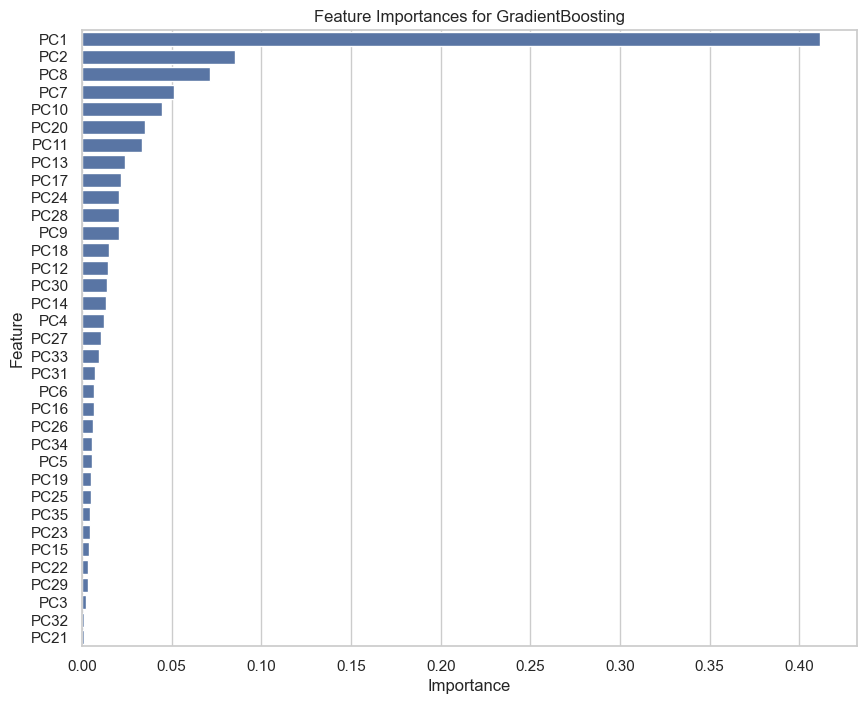

In [62]:

# Nome delle componenti principali
pca_feature_names = [f'PC{i+1}' for i in range(num_components)]

# Funzione per plot dell'importanza delle feature
def plot_feature_importances(importances, model_name):
    feature_importances = pd.DataFrame({'Feature': pca_feature_names, 'Importance': importances})
    feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importances)
    plt.title(f'Feature Importances for {model_name}')
    plt.show()

# Visualizzazione dell'importanza delle feature per RandomForest
rf_importances = random_searches['RandomForest'].best_estimator_.feature_importances_
plot_feature_importances(rf_importances, 'RandomForest')

# Visualizzazione dell'importanza delle feature per DecisionTree
dt_importances = random_searches['DecisionTree'].best_estimator_.feature_importances_
plot_feature_importances(dt_importances, 'DecisionTree')

# Visualizzazione dell'importanza delle feature per GradientBoosting
gb_importances = random_searches['GradientBoosting'].best_estimator_.feature_importances_
plot_feature_importances(gb_importances, 'GradientBoosting')


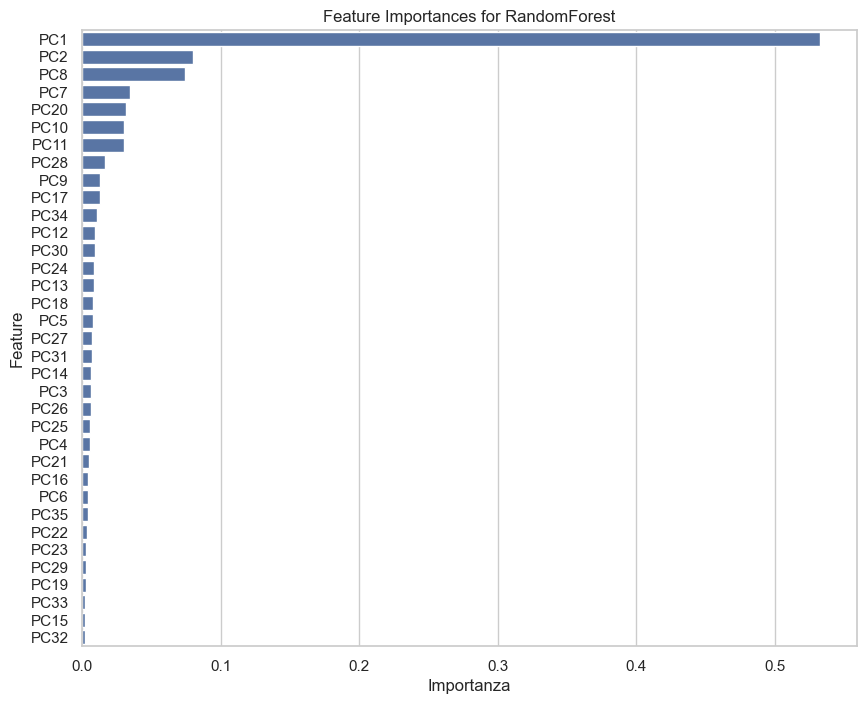

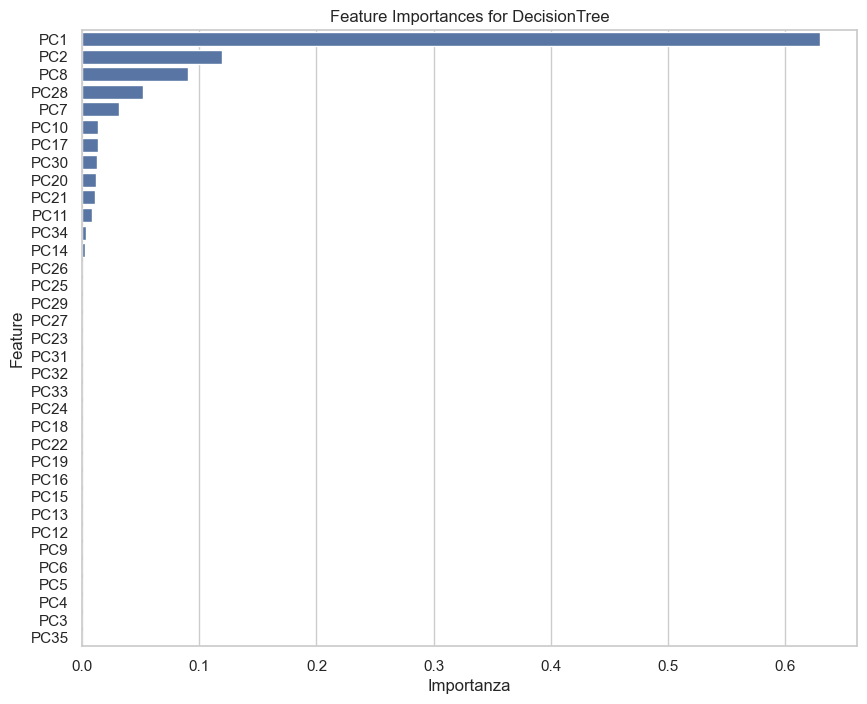

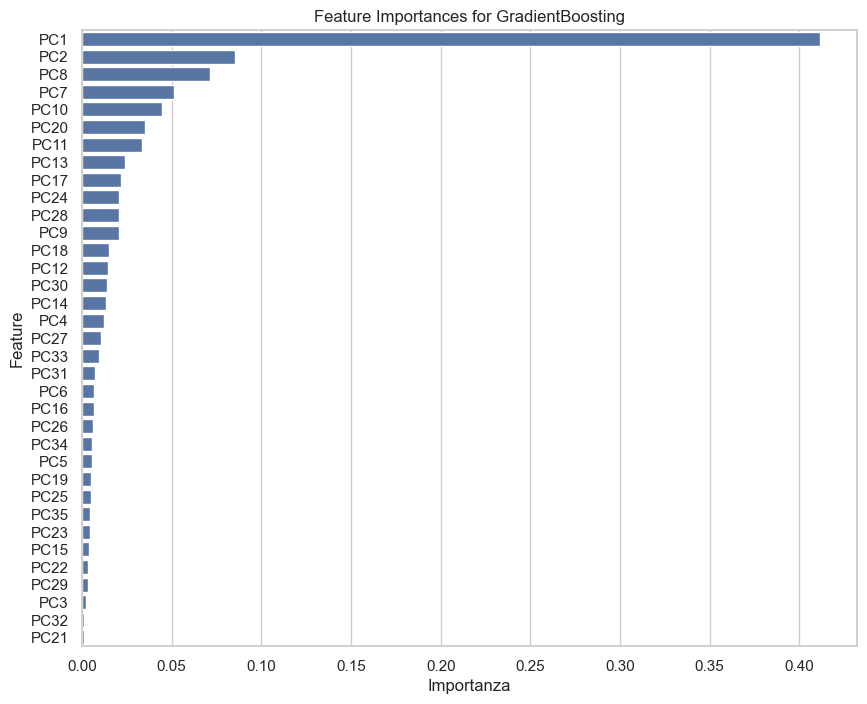

In [50]:

# Definire le etichette delle componenti principali
pca_feature_names = [f'PC{i+1}' for i in range(num_components)]

# Funzione per visualizzare l'importanza delle feature
def plot_feature_importances(importances, model_name):
    feature_importances = pd.DataFrame({'Feature': pca_feature_names, 'Importance': importances})
    feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importances)
    plt.title(f'Feature Importances for {model_name}')
    plt.xlabel('Importanza')
    plt.ylabel('Feature')
    plt.show()

# Visualizzazione dell'importanza delle feature per RandomForest
if 'RandomForest' in random_searches:
    rf_importances = random_searches['RandomForest'].best_estimator_.feature_importances_
    plot_feature_importances(rf_importances, 'RandomForest')

# Visualizzazione dell'importanza delle feature per DecisionTree
if 'DecisionTree' in random_searches:
    dt_importances = random_searches['DecisionTree'].best_estimator_.feature_importances_
    plot_feature_importances(dt_importances, 'DecisionTree')

# Visualizzazione dell'importanza delle feature per GradientBoosting
if 'GradientBoosting' in random_searches:
    gb_importances = random_searches['GradientBoosting'].best_estimator_.feature_importances_
    plot_feature_importances(gb_importances, 'GradientBoosting')
